In [1]:
#Importation des modules de Python 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Ouverture des fichiers


In [2]:
#Ouverture de notre jeux de données principale
usa =  pd.read_csv('usa2.csv', sep=',', encoding='ISO-8859-1')

#Suppresion de la 1er colonne suivante dérengeante
usa = usa.drop(['Unnamed: 0'],axis=1)

usa.head(10)

,cbssa,name,state,NameState,PartUSA,Political,Candidat,BorderSea,Anglais_Off,POP10,...,MORE65p,NODIPLOMp,F9TO12THp,UNDERGRADp,GRADUATEp,F0TO20p,F20TO40p,F40TO60p,F60TO80p,F80TO100p
0,10100,Aberdeen,SD,South Dakota,North-West,Republicain,Trump,No,Yes,40602,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Aberdeen,WA,Washington,North-East,Republicain,Trump,Yes,No,72797,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Abilene,TX,Texas,South-West,Republicain,Trump,No,No,165252,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Ada,OK,Oklahoma,South-West,Republicain,Trump,No,No,37492,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Adrian,MI,Michigan,North-East,Republicain,Trump,No,No,99892,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17
5,10420,Akron,OH,Ohio,North-East,Democrate,Clinton,No,No,703200,...,14.19,2.40,41.01,28.23,28.35,19.44,20.94,18.41,22.62,18.58
6,10460,Alamogordo,NM,New Mexico,South-West,Republicain,Trump,No,No,63797,...,14.97,7.64,36.30,38.59,17.47,24.72,26.37,19.51,19.12,10.28
7,10500,Albany,GA,Georgia,South-East,Democrate,Clinton,No,Yes,157308,...,11.99,6.32,46.68,30.91,16.09,29.28,24.08,16.34,18.18,12.11
8,10540,Albany,OR,Oregon,North-West,Republicain,Trump,No,No,116672,...,15.42,3.31,40.64,39.90,16.15,19.64,22.61,21.00,24.04,12.70
9,10580,Albany-Schenectady-Troy,NY,New-York,North-East,Republicain,Trump,No,No,870716,...,14.04,2.74,34.33,29.35,33.57,14.89,17.97,16.49,24.91,25.74


In [3]:
#Candidat Trump
trump = usa[usa["Candidat"] == 'Trump']

#Candidat Clinton
clinton = usa[usa['Candidat'] == 'Clinton']

# 2 - Résultats généraux 

Pour rappel, le candidat Donald Trump à remporter cette élection présidentielle face à Hillary Clinton, ayant obtenu un plus grand nombre de grands électeurs malgré que la candidate perdante eût obtenue un plus grand nombre de voix de la part des électeurs américaines

In [4]:
res_candidat = ["Trump","Clinton"]
res_gen_etat = [304,227]
res_gen_pop = [62984828,65853514]


df1 = pd.DataFrame([res_candidat,res_gen_etat,res_gen_pop], index = [0, 1,2])


df1.rename(columns={0:'Trump',1:'Clinton'},index={0:"Candidat",1:"Etat",2:"Pop"}, inplace = True)

df1 = df1.T

df1


,Candidat,Etat,Pop
Trump,Trump,304,62984828
Clinton,Clinton,227,65853514


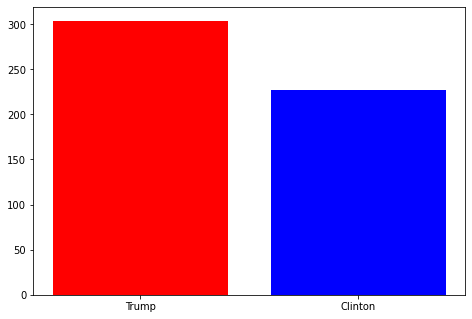

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df1["Candidat"],df1["Etat"],color=['red','blue'])
plt.show()

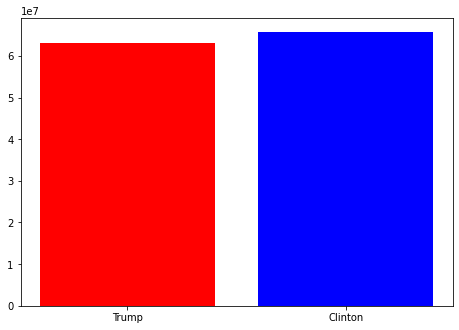

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df1["Candidat"],df1["Pop"],color=['red','blue'])
plt.show()

### 1-1 Nombre de communes

In [7]:
print(f'On a {trump.shape[0]} communes gagnés par Trump.')


On a 647 communes gagnés par Trump.


In [8]:
print(f'On a {clinton.shape[0]} communes gagnés par Clinton.')

On a 270 communes gagnés par Clinton.


In [13]:
candidat = [trump.shape[0],clinton.shape[0]]
nom = ["Trump","Clinton"]

candidat = pd.DataFrame([candidat,nom] , index = [0,1])

candidat = candidat.T




candidat.rename(index={0:'Trump',1:'Clinton'},columns={0:"nb_com",1:"nom"}, inplace = True)


candidat

,nb_com,nom
Trump,647,Trump
Clinton,270,Clinton


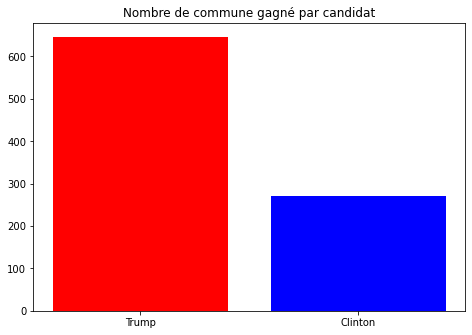

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(candidat["nom"],candidat["nb_com"],color=['red','blue'])

plt.title("Nombre de commune gagné par candidat")
plt.show()

ValueError: could not convert string to float: 'Trump'

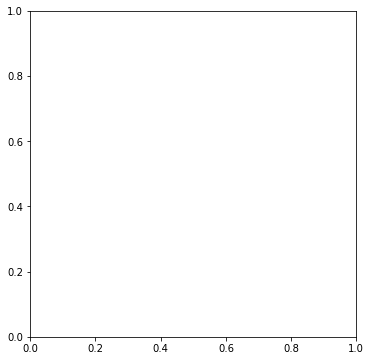

In [19]:
#Diagramme circulaire
plt.figure(figsize=(10,6))

plt.pie(candidat,labels = ["Trump","Clinton"], autopct = '%.2f%%')
plt.title('Nombre de communes par candidat')
plt.savefig("Commune_candidat.png")

plt.show()

### 1-2 nombre d'habitants par le candidat obtenu

In [20]:
candidat_pop = [sum(trump['POP10']),sum(clinton['POP10'])]
candidat_pop

[75060500, 213265486]

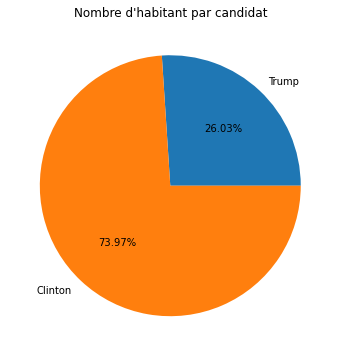

In [21]:
#Diagramme circulaire
plt.figure(figsize=(10,6))

plt.pie(candidat_pop,labels = ["Trump","Clinton"], autopct = '%.2f%%')
plt.title('Nombre d\'habitant par candidat')
plt.savefig("Population_candidat.png")

plt.show()

### 1-3 Analyse des candidats par Etat

In [22]:
# Pour Trump

trump.NameState.value_counts()

Texas             54
Ohio              37
Indiana           34
Tennessee         24
Pensylvania       24
Michigan          24
Florida           23
Missouri          22
Illinois          22
Georgia           21
North Carolina    21
Oklahoma          21
Kentucky          18
Alabama           17
Iowa              17
Oregon            16
Wisconsin         16
Kansas            16
Minnesota         16
New-York          16
Arkansas          15
Louisiana         14
Washington        13
Mississippi       12
California        12
Idaho             12
West Virginia     11
South Carolina    10
South Dakota      10
Nebraska          10
Colorado           9
North Dakota       8
Wyoming            8
Utah               8
Nevada             7
New Mexico         7
Arizona            7
Maine              3
Montana            3
Virginia           2
Maryland           2
Alaska             2
Hew Hamsphire      1
New Jersey         1
Connecticut        1
Name: NameState, dtype: int64

In [23]:
# Pour Trump

clinton.NameState.value_counts()

California              22
North Carolina          18
Georgia                 16
Texas                   14
New Mexico              11
Pensylvania             10
Virginia                10
New-York                10
Mississippi              9
Michigan                 9
Colorado                 8
Wisconsin                8
Washington               7
Massachusetts            7
Florida                  6
Iowa                     6
Ohio                     6
Hew Hamsphire            5
Illinois                 5
South Carolina           5
Maryland                 5
Vermont                  4
Hawaï                    4
Arkansas                 4
Arizona                  4
Kansas                   4
Minnesota                4
Montana                  4
Oregon                   4
Connecticut              4
Alabama                  4
New Jersey               3
Missouri                 3
Louisiana                3
Wyoming                  2
West Virginia            2
Indiana                  2
A

In [24]:
usa.columns

Index(['cbssa', 'name', 'state', 'NameState', 'PartUSA', 'Political',
       'Candidat', 'BorderSea', 'Anglais_Off', 'POP10', 'WHITEp', 'BLACKp',
       'ASIANp', 'OTHERp', 'HISPAp', 'UNDER18p', 'F18TO24p', 'F25TO44p',
       'F45TO64p', 'MORE65p', 'NODIPLOMp', 'F9TO12THp', 'UNDERGRADp',
       'GRADUATEp', 'F0TO20p', 'F20TO40p', 'F40TO60p', 'F60TO80p',
       'F80TO100p'],
      dtype='object')

#### Par région des Etats-Unis

In [25]:
# Pour Trump

trump.PartUSA.value_counts()

North-East    263
South-East    157
South-West    143
North-West     82
OTHER           2
Name: PartUSA, dtype: int64

In [26]:
# Pour Clinton

clinton.PartUSA.value_counts()

North-East    109
South-East     67
South-West     67
North-West     21
OTHER           6
Name: PartUSA, dtype: int64

# 2 - Analyse de la population selon les candidats

### 2-1 Pour Trump

In [27]:
#Nombre d'habitants totale dans les communes de Trump


print(f'On a {sum(trump.POP10)} d\'habitants sur nos aires urbaines étudiés, soit {round((sum(trump.POP10)/331000000)*100,2)} % de la population totale')

On a 75060500 d'habitants sur nos aires urbaines étudiés, soit 22.68 % de la population totale


In [28]:
#Population ethnique

#On calcule les proportions des communautés



#on va créer un fonction pour faire des proportions
pop_trump = list(trump.POP10)

#population blanche
prop_blanche = list(trump.WHITEp/100)
pop_blanche = list()
for i in range(647):
    pop_blanche.append(round(pop_trump[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(trump.BLACKp/100)
pop_noir = list()
for i in range(647):
    pop_noir.append(round(pop_trump[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(trump.HISPAp/100)
pop_hispa = list()
for i in range(647):
    pop_hispa.append(round(pop_trump[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(trump.ASIANp/100)
pop_asia = list()
for i in range(647):
    pop_asia.append(round(pop_trump[i]*prop_asia[i]))

# population autres
prop_other = list(trump.OTHERp/100)
pop_other = list()
for i in range(647):
    pop_other.append(round(pop_trump[i]*prop_other[i]))

    
    
trump_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
trump_etno    

[56972730, 6823996, 7820315, 1201434, 2241491]

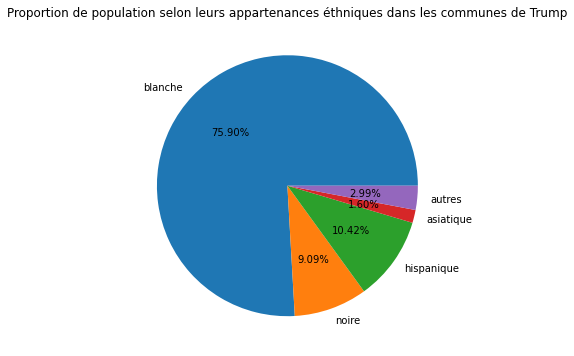

In [29]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(trump_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs appartenances éthniques dans les communes de Trump')
plt.savefig("Trump_etnique.png")

plt.show()

In [30]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_trump = list(trump.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(trump.UNDER18p/100)
pop_m18 = list()
for i in range(647):
    pop_m18.append(round(pop_trump[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(trump.F18TO24p/100)
pop_d18a25 = list()
for i in range(647):
    pop_d18a25.append(round(pop_trump[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(trump.F25TO44p/100)
pop_d25a44 = list()
for i in range(647):
    pop_d25a44.append(round(pop_trump[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(trump.F45TO64p/100)
pop_de45a64 = list()
for i in range(647):
    pop_de45a64.append(round(pop_trump[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(trump.MORE65p/100)
pop_p65 = list()
for i in range(647):
    pop_p65.append(round(pop_trump[i]*prop_p65[i]))

    
    
trump_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
trump_age

[17724655, 7610639, 18582510, 20080461, 11062438]

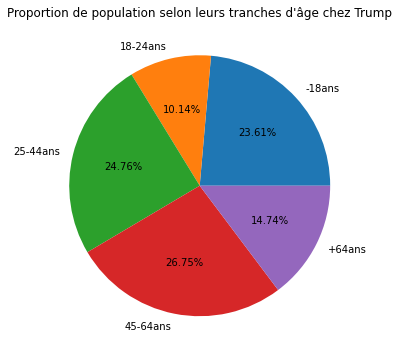

In [31]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(trump_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs tranches d\'âge chez Trump')
plt.savefig("Trump_age.png")

plt.show()

In [32]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_trump = list(trump.POP10)

#population non diplômé
prop_nodiplome = list(usa.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(647):
    pop_nodiplome.append(round(pop_trump[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(trump.F9TO12THp/100)
pop_lycee = list()
for i in range(647):
    pop_lycee.append(round(pop_trump[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(trump.UNDERGRADp/100)
pop_bac = list()
for i in range(647):
    pop_bac.append(round(pop_trump[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(trump.GRADUATEp/100)
pop_univ = list()
for i in range(647):
    pop_univ.append(round(pop_trump[i]*prop_univ[i]))

    
trump_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
trump_scolaire

[4415230, 31317269, 22793946, 16699572]

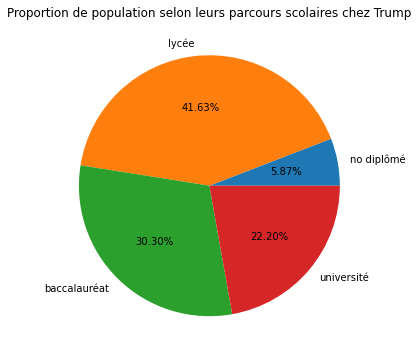

In [33]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(trump_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs parcours scolaires chez Trump')
plt.savefig("Trump_scolaire.png")

plt.show()

In [25]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_trump = list(trump.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(trump.F0TO20p/100)
pop_m20d = list()
for i in range(647):
    pop_m20d.append(round(pop_trump[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(trump.F20TO40p/100)
pop_m2040d = list()
for i in range(647):
    pop_m2040d.append(round(pop_trump[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(trump.F40TO60p/100)
pop_m4060d = list()
for i in range(647):
    pop_m4060d.append(round(pop_trump[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(trump.F60TO80p/100)
pop_m6080d = list()
for i in range(647):
    pop_m6080d.append(round(pop_trump[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(trump.F80TO100p/100)
pop_p80d = list()
for i in range(647):
    pop_p80d.append(round(pop_trump[i]*prop_p80d[i])) 
    
    
trump_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
trump_revenu

[15281801, 17495787, 13772008, 16614726, 11896449]

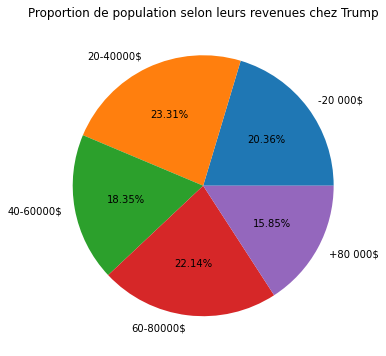

In [26]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(trump_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs revenues chez Trump')
plt.savefig("Trump_revenu.png")

plt.show()

### 2-2 Pour Clinton

In [27]:
#Population ethnique

#On calcule les proportions des communautés



#on va créer un fonction pour faire des proportions
pop_clinton = list(clinton.POP10)

#population blanche
prop_blanche = list(clinton.WHITEp/100)
pop_blanche = list()
for i in range(270):
    pop_blanche.append(round(pop_clinton[i]*prop_blanche[i]))
    
#population noire
prop_noir = list(clinton.BLACKp/100)
pop_noir = list()
for i in range(270):
    pop_noir.append(round(pop_clinton[i]*prop_noir[i]))

# population hispanique
prop_hispa = list(clinton.HISPAp/100)
pop_hispa = list()
for i in range(270):
    pop_hispa.append(round(pop_clinton[i]*prop_hispa[i]))

#population asiatique
prop_asia = list(clinton.ASIANp/100)
pop_asia = list()
for i in range(270):
    pop_asia.append(round(pop_clinton[i]*prop_asia[i]))

# population autres
prop_other = list(clinton.OTHERp/100)
pop_other = list()
for i in range(270):
    pop_other.append(round(pop_clinton[i]*prop_other[i]))

    
    
clinton_etno = [sum(pop_blanche),sum(pop_noir),sum(pop_hispa),sum(pop_asia),sum(pop_other)]    
clinton_etno  

[123245274, 29178886, 41404842, 13157617, 6277519]

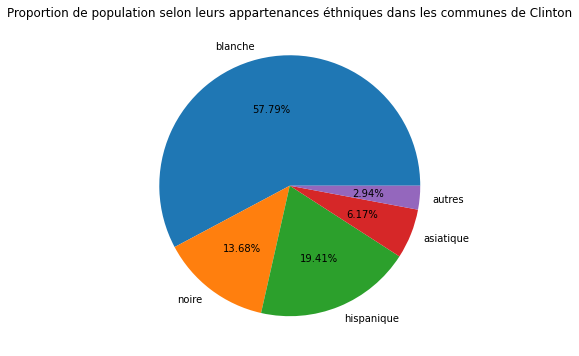

In [28]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(clinton_etno,labels = ["blanche","noire","hispanique","asiatique","autres"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs appartenances éthniques dans les communes de Clinton')
plt.savefig("Clinton_etnique.png")

plt.show()

In [29]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_clinton = list(clinton.POP10)

#population mineur(moins de 18 ans)
prop_m18 = list(clinton.UNDER18p/100)
pop_m18 = list()
for i in range(270):
    pop_m18.append(round(pop_clinton[i]*prop_m18[i]))
    
#population de jeunes d'entre 18 et 25 ans
prop_d18a25 = list(clinton.F18TO24p/100)
pop_d18a25 = list()
for i in range(270):
    pop_d18a25.append(round(pop_clinton[i]*prop_d18a25[i]))

# population de personnes d'entre 25 et 44 ans
prop_d25a44 = list(clinton.F25TO44p/100)
pop_d25a44 = list()
for i in range(270):
    pop_d25a44.append(round(pop_clinton[i]*prop_d25a44[i]))

#population de personnes d'entre 45 et 64 ans
prop_de45a64 = list(clinton.F45TO64p/100)
pop_de45a64 = list()
for i in range(270):
    pop_de45a64.append(round(pop_clinton[i]*prop_de45a64[i]))

# population de personne de plus de 64 ans
prop_p65 = list(clinton.MORE65p/100)
pop_p65 = list()
for i in range(270):
    pop_p65.append(round(pop_clinton[i]*prop_p65[i]))

    
    
clinton_age = [sum(pop_m18),sum(pop_d18a25),sum(pop_d25a44),sum(pop_de45a64),sum(pop_p65)]    
clinton_age

[51646310, 21354619, 58817732, 55649571, 25796742]

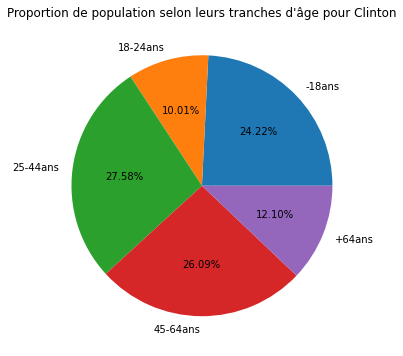

In [30]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(clinton_age,labels = ["-18ans","18-24ans","25-44ans","45-64ans","+64ans"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs tranches d\'âge pour Clinton')
plt.savefig("Clinton_age.png")

plt.show()

In [31]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_clinton = list(clinton.POP10)

#population non diplômé
prop_nodiplome = list(clinton.NODIPLOMp/100)
pop_nodiplome = list()
for i in range(270):
    pop_nodiplome.append(round(pop_clinton[i]*prop_nodiplome[i]))
    
#population de niveau lycée
prop_lycee = list(clinton.F9TO12THp/100)
pop_lycee = list()
for i in range(270):
    pop_lycee.append(round(pop_clinton[i]*prop_lycee[i]))

# population de baccalauréat
prop_bac = list(clinton.UNDERGRADp/100)
pop_bac = list()
for i in range(270):
    pop_bac.append(round(pop_clinton[i]*prop_bac[i]))

#population de diplômé dans le supérieur
prop_univ = list(clinton.GRADUATEp/100)
pop_univ = list()
for i in range(270):
    pop_univ.append(round(pop_clinton[i]*prop_univ[i]))

    
clinton_scolaire = [sum(pop_nodiplome),sum(pop_lycee),sum(pop_bac),sum(pop_univ)]    
clinton_scolaire

[13221085, 71372390, 60872406, 67801081]

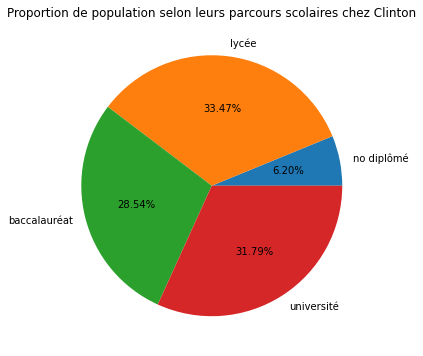

In [32]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(clinton_scolaire,labels = ["no diplômé","lycée","baccalauréat","université"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs parcours scolaires chez Clinton')
plt.savefig("Clinton_scolaire.png")

plt.show()

In [33]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_clinton = list(clinton.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(clinton.F0TO20p/100)
pop_m20d = list()
for i in range(270):
    pop_m20d.append(round(pop_clinton[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(clinton.F20TO40p/100)
pop_m2040d = list()
for i in range(270):
    pop_m2040d.append(round(pop_clinton[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(clinton.F40TO60p/100)
pop_m4060d = list()
for i in range(270):
    pop_m4060d.append(round(pop_clinton[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(clinton.F60TO80p/100)
pop_m6080d = list()
for i in range(270):
    pop_m6080d.append(round(pop_clinton[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(clinton.F80TO100p/100)
pop_p80d = list()
for i in range(270):
    pop_p80d.append(round(pop_clinton[i]*prop_p80d[i])) 
    
    
clinton_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
clinton_revenu

[35138963, 40389273, 34833722, 48054940, 54847225]

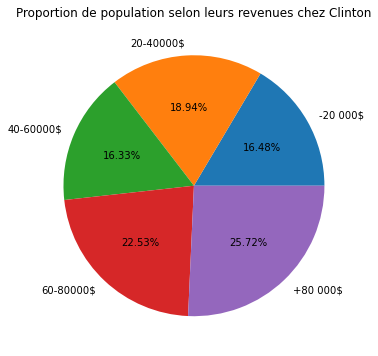

In [34]:
plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(clinton_revenu,labels = ["-20 000$","20-40000$","40-60000$","60-80000$","+80 000$"], autopct = '%.2f%%')
plt.title('Proportion de population selon leurs revenues chez Clinton')
plt.savefig("Clinton_revenu.png")

plt.show()

In [35]:
#On calcule les proportions des tranches d'âges

#on va créer un fonction pour faire des proportions
pop_ne = list(n_e.POP10)

#population ayant un revenu de moins de 20000$
prop_m20d = list(n_e.F0TO20p/100)
pop_m20d = list()
for i in range(372):
    pop_m20d.append(round(pop_ne[i]*prop_m20d[i]))
    
#population ayant un revenu d'entre 20000 et 40000$
prop_m2040d = list(n_e.F20TO40p/100)
pop_m2040d = list()
for i in range(372):
    pop_m2040d.append(round(pop_ne[i]*prop_m2040d[i]))

#population ayant un revenu d'entre 40000 et 60000$ 
prop_m4060d = list(n_e.F40TO60p/100)
pop_m4060d = list()
for i in range(372):
    pop_m4060d.append(round(pop_ne[i]*prop_m4060d[i]))

#population ayant un revenu d'entre 60000 et 80000$ 
prop_m6080d = list(n_e.F60TO80p/100)
pop_m6080d = list()
for i in range(372):
    pop_m6080d.append(round(pop_ne[i]*prop_m6080d[i]))
    
#population ayant un revenu de plus de 80000$
prop_p80d = list(n_e.F80TO100p/100)
pop_p80d = list()
for i in range(372):
    pop_p80d.append(round(pop_ne[i]*prop_p80d[i])) 
    
    
ne_revenu = [sum(pop_m20d),sum(pop_m2040d),sum(pop_m4060d),sum(pop_m6080d),sum(pop_p80d)]    
ne_revenu

NameError: name 'n_e' is not defined

# 4- Résumer et comparaisons


In [36]:
#Candidat Trump
trump = usa[usa["Candidat"] == 'Trump']

trump

,cbssa,name,state,NameState,PartUSA,Political,Candidat,BorderSea,Anglais_Off,POP10,...,MORE65p,NODIPLOMp,F9TO12THp,UNDERGRADp,GRADUATEp,F0TO20p,F20TO40p,F40TO60p,F60TO80p,F80TO100p
0,10100,Aberdeen,SD,South Dakota,North-West,Republicain,Trump,No,Yes,40602,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Aberdeen,WA,Washington,North-East,Republicain,Trump,Yes,No,72797,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Abilene,TX,Texas,South-West,Republicain,Trump,No,No,165252,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Ada,OK,Oklahoma,South-West,Republicain,Trump,No,No,37492,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Adrian,MI,Michigan,North-East,Republicain,Trump,No,No,99892,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,49660,Youngstown-Warren-Boardman,OH,Ohio,North-East,Republicain,Trump,No,No,565773,...,17.83,3.41,51.53,26.03,19.04,22.83,24.82,18.80,21.42,12.13
913,49700,Yuba City,CA,California,South-West,Republicain,Trump,No,Yes,166892,...,11.53,10.68,35.06,37.87,16.39,18.25,22.52,19.22,23.02,16.99
914,49740,Yuma,AZ,Arizona,South-West,Republicain,Trump,No,Yes,195751,...,15.66,15.04,38.52,32.28,14.15,21.11,27.54,19.47,20.98,10.90
915,49780,Zanesville,OH,Ohio,North-East,Republicain,Trump,No,No,86074,...,15.32,2.99,55.18,28.03,13.80,24.67,24.90,18.96,20.75,10.73


In [37]:
pop_trump = sum(trump.POP10)
pop_trump

75060500

In [38]:
#Population moyenne
pop_trump/647

116013.13755795981

In [39]:
np.mean(trump.POP10)

116013.13755795981

In [44]:
pop_clinton  = sum(clinton.POP10)
pop_clinton

213265486

In [45]:
pop_clinton/270

789872.1703703704

### 5-2 Âge moyen

In [46]:
age_classe = [9,21,34,54,75]

#### Äge moyen pour Trump

In [68]:
age_trump = [17724655/pop_trump, 7610639/pop_trump, 18582510/pop_trump, 20080461/pop_trump, 11062438/pop_trump]

age_trump 

[0.23613824847955983,
 0.10139339599389825,
 0.24756709587599338,
 0.2675236775667628,
 0.14738028656883448]

In [69]:

s_t = 0
for i in range(5):
    s_t += age_classe[i]*(age_trump[i])
    
round(s_t,1)    

38.2

In [41]:
trump.columns

Index(['cbssa', 'name', 'state', 'NameState', 'PartUSA', 'Political',
       'Candidat', 'BorderSea', 'Anglais_Off', 'POP10', 'WHITEp', 'BLACKp',
       'ASIANp', 'OTHERp', 'HISPAp', 'UNDER18p', 'F18TO24p', 'F25TO44p',
       'F45TO64p', 'MORE65p', 'NODIPLOMp', 'F9TO12THp', 'UNDERGRADp',
       'GRADUATEp', 'F0TO20p', 'F20TO40p', 'F40TO60p', 'F60TO80p',
       'F80TO100p'],
      dtype='object')

#### Âge moyen pour Cliton

In [70]:
age_clinton = [51646310/pop_clinton, 21354619/pop_clinton, 58817732/pop_clinton, 55649571/pop_clinton, 25796742/pop_clinton]


age_clinton

[0.24216909622216132,
 0.10013162186027606,
 0.27579583130483665,
 0.26094035206428107,
 0.1209606977849196]

In [71]:
#age moyen clinton
s_c = 0
for i in range(5):
    s_c += age_classe[i]*(age_clinton[i])
    
round(s_c,1)  

36.8

### 5_3 Revenu moyen

In [58]:
rev_classe = [10000,30000,50000,70000,90000]

#### Revenue moyen pour Trump

In [74]:
rev_trump = [15281801/pop_trump, 17495787/pop_trump, 13772008/pop_trump, 16614726/pop_trump, 11896449/pop_trump]


rev_trump

[0.20359311488732423,
 0.2330891347646232,
 0.1834787671278502,
 0.22135112342710214,
 0.15849147021402735]

In [75]:
rc = 0

for i in range(5):
    rc += rev_classe[i]*(rev_trump[i])
    
round(rc,1) 

47961.4

#### Revenu moyen pour Clinton

In [72]:


rev_clinton = [35138963/pop_clinton, 40389273/pop_clinton, 34833722/pop_clinton, 48054940/pop_clinton, 54847225/pop_clinton]


rev_clinton

[0.16476629040669055,
 0.18938494811110693,
 0.1633350180253733,
 0.22532919367928103,
 0.25717815868246025]

In [73]:
rc = 0

for i in range(5):
    rc += rev_classe[i]*(rev_clinton[i])
    
round(rc,1) 

54415.0